In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency #Importing Libraries for Preprocessing

In [2]:
os.chdir("C:\\Users\\I B BHATT\\Desktop\\machine learning\\edwisor-projects") #change working directory
os.getcwd()

'C:\\Users\\I B BHATT\\Desktop\\machine learning\\edwisor-projects'

In [3]:
#Read the data.
bike_rental = pd.read_csv("day.csv")
print (bike_rental.head())
print (bike_rental.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(731, 16)


In [4]:
#Datatypes of Variables
bike_rental.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
#Changing numerical datatype of category variables to Categorical data type
for i in range(2,9):
    bike_rental.iloc[:,i] = bike_rental.iloc[:,i].astype('category')

In [6]:
bike_rental.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [7]:
# Denormalizing the data to analyze it better
bike_rental.set_index('instant',inplace = True)
bike_rental['Actualtemp'] = bike_rental['temp']*47-16
bike_rental['Actualatemp'] = bike_rental['atemp']*66-16
bike_rental['Humidity'] = bike_rental['hum']*67
bike_rental['Actualwindspeed'] = bike_rental['windspeed']*100
bike_rental['Season_abbr'] = bike_rental['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
bike_rental['Year'] = bike_rental['yr'].replace([0,1],[2011,2012])
bike_rental['Weather Type'] = bike_rental['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Snow','Heavy Rain'])


In [8]:
bike_rental.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,casual,registered,cnt,Actualtemp,Actualatemp,Humidity,Actualwindspeed,Season_abbr,Year,Weather Type
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,331,654,985,0.175849,7.999250,53.990811,16.0446,Spring,2011,Mist
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,...,131,670,801,1.083466,7.346774,46.637829,24.8539,Spring,2011,Mist
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,...,120,1229,1349,-6.770892,-3.499270,29.297291,24.8309,Spring,2011,Clear
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,...,108,1454,1562,-6.600000,-1.999948,39.559145,16.0296,Spring,2011,Clear
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,...,82,1518,1600,-5.333021,-0.868180,29.276119,18.6900,Spring,2011,Clear


In [9]:
#changing new categorical variaables data type
for i in range(-3,0):
    bike_rental.iloc[:,i] = bike_rental.iloc[:,i].astype('category')

In [10]:
#Missing Value Analysis
bike_rental.isnull().sum()

dteday             0
season             0
yr                 0
mnth               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
registered         0
cnt                0
Actualtemp         0
Actualatemp        0
Humidity           0
Actualwindspeed    0
Season_abbr        0
Year               0
Weather Type       0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


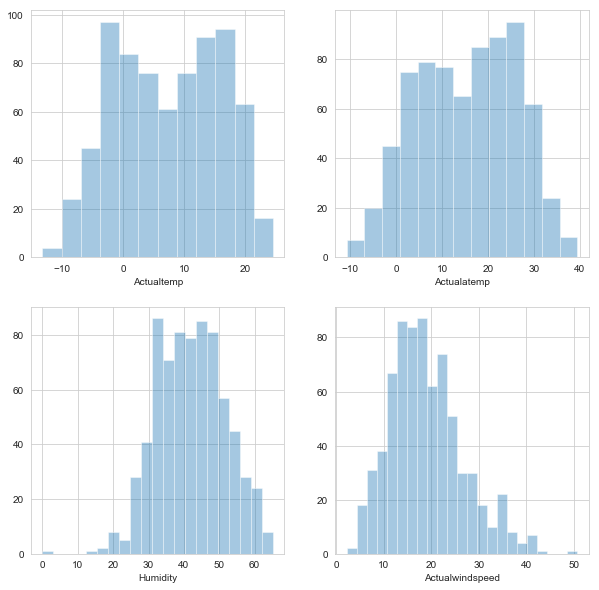

In [11]:
#Plotting Histogram for univariate analysis by using seaborn library
sns.set_style("whitegrid")
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(bike_rental['Actualtemp'],kde= False)
plt.subplot(2,2,2)
sns.distplot(bike_rental['Actualatemp'],kde= False)
plt.subplot(2,2,3)
sns.distplot(bike_rental['Humidity'],kde= False)
plt.subplot(2,2,4)
sns.distplot(bike_rental['Actualwindspeed'],kde= False)


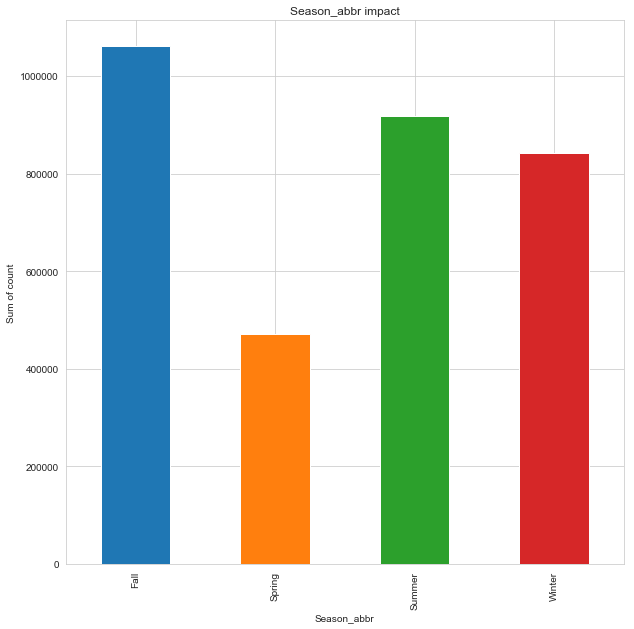

In [12]:
#Plotting bar graph of categorical variable with matplotlib (just an example)
season = bike_rental.groupby('Season_abbr').cnt.sum()
#year = bike_rental.groupby('Year').cnt.sum()
#Weather = bike_rental.groupby('Weather Type').cnt.sum()
bar = plt.figure()
plot1 = bar.add_subplot(1,1,1)
plot1.set_xlabel('Season_abbr')
plot1.set_ylabel('Sum of count')
plot1.set_title("Season_abbr impact")
season.plot(kind='bar',figsize = (10,10))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


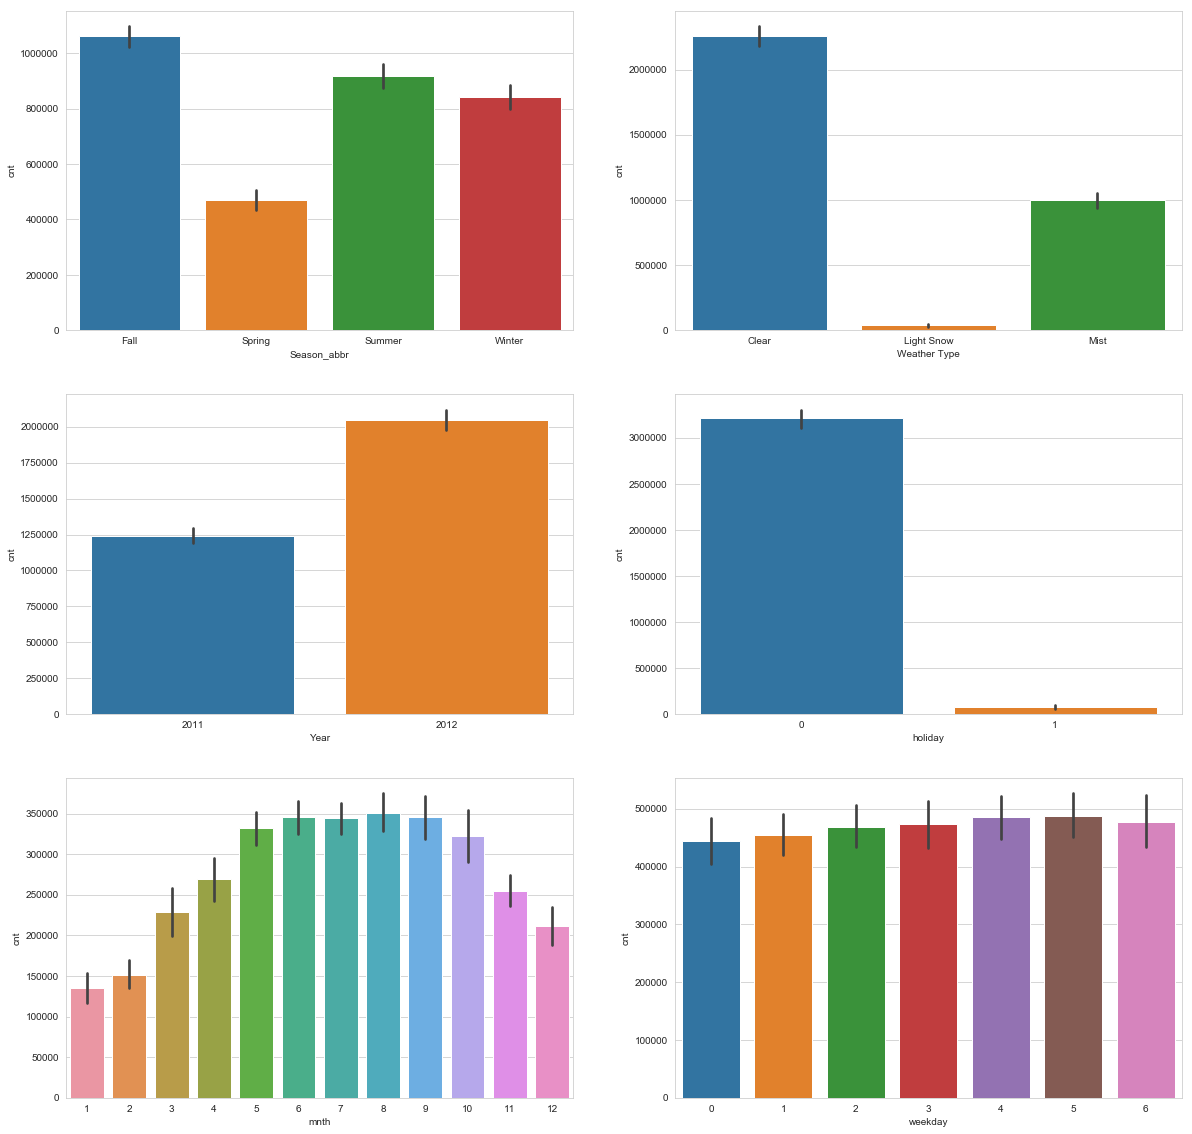

In [14]:
#Plotting bar graphs using seaborn library
sns.set_style("whitegrid")
plt.figure(figsize = (20,20))
plt.subplot(3,2,1)
sns.barplot("Season_abbr","cnt",estimator =sum, data=bike_rental) #estimator is mean by default
plt.subplot(3,2,2)
sns.barplot("Weather Type","cnt",estimator =sum, data=bike_rental)
plt.subplot(3,2,3)
sns.barplot("Year","cnt",estimator =sum, data=bike_rental)
plt.subplot(3,2,4)
sns.barplot("holiday","cnt",estimator =sum, data=bike_rental)
plt.subplot(3,2,5)
sns.barplot("mnth","cnt",estimator =sum, data=bike_rental)
plt.subplot(3,2,6)
sns.barplot("weekday","cnt",estimator =sum, data=bike_rental)



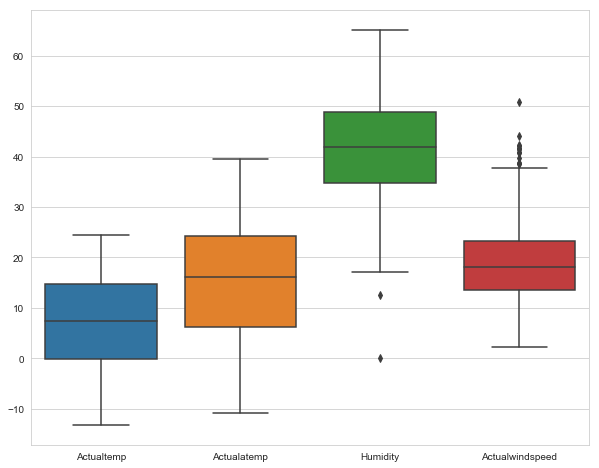

In [15]:
#Outlier Analysis using Box plots
plt.figure(figsize = (10,8))
sns.boxplot(data=bike_rental.iloc[:,-7)

In [16]:
#Outlier Removal from Humidity
q_25,q_75 = np.percentile(bike_rental['Humidity'],[25,75])
iqr = q_75 -q_25
max_out = q_75 + (iqr*1.5)
min_out = q_25 - (iqr*1.5) 
bike_rental = bike_rental.drop(bike_rental[bike_rental.Humidity>max_out].index)
bike_rental = bike_rental.drop(bike_rental[bike_rental.Humidity<min_out].index)


In [17]:
#Outlier Removal from windspeed
q_25,q_75 = np.percentile(bike_rental['Actualwindspeed'],[25,75])
iqr = q_75 -q_25
max_out = q_75+ (iqr*1.5)
min_out = q_25 - (iqr*1.5)
bike_rental = bike_rental.drop(bike_rental[bike_rental.Actualwindspeed>max_out].index)
bike_rental = bike_rental.drop(bike_rental[bike_rental.Actualwindspeed<min_out].index)


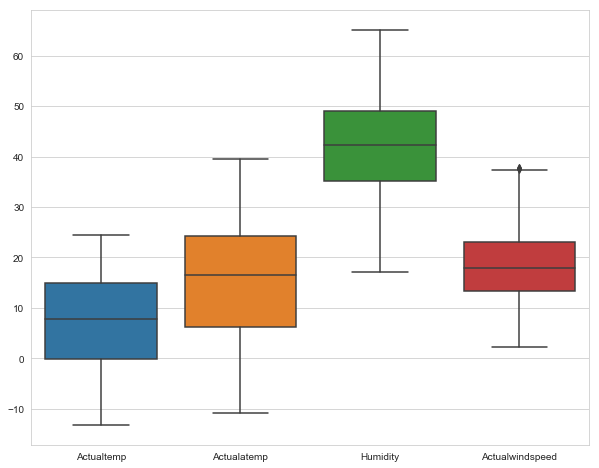

In [18]:
#boxplot after outlier removal
plt.figure(figsize = (10,8))
sns.boxplot(data=bike_rental.iloc[:,-7:-3])

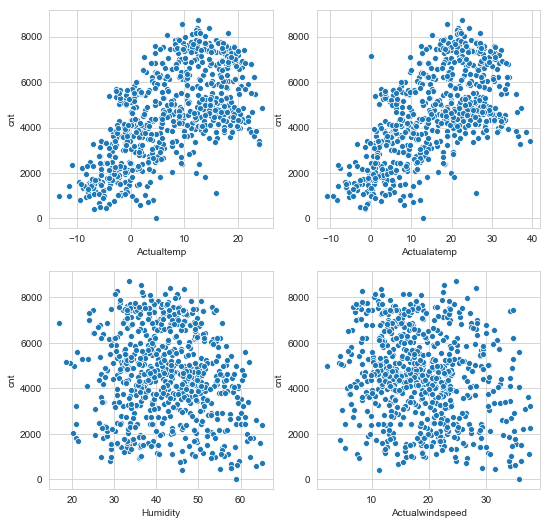

In [19]:
#Scatter plot of continuous variable with count using sns,scatterplot
plt.figure(figsize = (8.8,8.8))
plt.subplot(2,2,1)
sns.scatterplot(bike_rental['Actualtemp'],bike_rental['cnt'])
plt.subplot(2,2,2)
sns.scatterplot(bike_rental['Actualatemp'],bike_rental['cnt'])
plt.subplot(2,2,3)
sns.scatterplot(bike_rental['Humidity'],bike_rental['cnt'])
plt.subplot(2,2,4)
sns.scatterplot(bike_rental['Actualwindspeed'],bike_rental['cnt'])

In [20]:
#Feature Selection Correlation Analysis
bike_rental.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt,Actualtemp,Actualatemp,Humidity,Actualwindspeed
temp,1.000000,0.991738,0.114191,-0.140169,0.539714,0.538095,0.625892,1.000000,0.991738,0.114191,-0.140169
atemp,0.991738,1.000000,0.126587,-0.166038,0.540234,0.541977,0.629204,0.991738,1.000000,0.126587,-0.166038
hum,0.114191,0.126587,1.000000,-0.204496,-0.101439,-0.124701,-0.136621,0.114191,0.126587,1.000000,-0.204496
windspeed,-0.140169,-0.166038,-0.204496,1.000000,-0.146178,-0.203677,-0.216193,-0.140169,-0.166038,-0.204496,1.000000
casual,0.539714,0.540234,-0.101439,-0.146178,1.000000,0.389848,0.670547,0.539714,0.540234,-0.101439,-0.146178
registered,0.538095,0.541977,-0.124701,-0.203677,0.389848,1.000000,0.944581,0.538095,0.541977,-0.124701,-0.203677
cnt,0.625892,0.629204,-0.136621,-0.216193,0.670547,0.944581,1.000000,0.625892,0.629204,-0.136621,-0.216193
Actualtemp,1.000000,0.991738,0.114191,-0.140169,0.539714,0.538095,0.625892,1.000000,0.991738,0.114191,-0.140169
Actualatemp,0.991738,1.000000,0.126587,-0.166038,0.540234,0.541977,0.629204,0.991738,1.000000,0.126587,-0.166038
Humidity,0.114191,0.126587,1.000000,-0.204496,-0.101439,-0.124701,-0.136621,0.114191,0.126587,1.000000,-0.204496


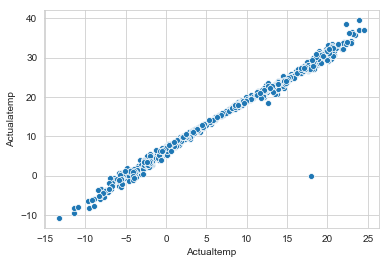

In [21]:
#scatter plot after finding higher correlation
sns.scatterplot(bike_rental['Actualtemp'],bike_rental['Actualatemp'])

In [22]:
#chi square test- just an example. got holiday highly dependent here
cat_names = ["season", "yr","holiday", "mnth", "weekday", "workingday", "weathersit"]
for i in cat_names:
    print (i)
    for j in cat_names:
        chi2,p,dof,ex = chi2_contingency(pd.crosstab(bike_rental[j],bike_rental[i]))
        print (j +" " + str(p))


season
season 0.0
yr 0.9988045067892455
holiday 0.6405517686631514
mnth 0.0
weekday 0.9999999999863494
workingday 0.9463398722072747
weathersit 0.013247578525739488
yr
season 0.9988045067892455
yr 4.442158824710222e-157
holiday 0.9948241356272471
mnth 0.9999999927410976
weekday 0.9999604571058672
workingday 0.9561016545276555
weathersit 0.18324950388069816
holiday
season 0.6405517686631514
yr 0.9948241356272471
holiday 2.156836435770226e-150
mnth 0.5712387246753158
weekday 5.970403488048813e-11
workingday 3.657542973609387e-11
weathersit 0.598729576961958
mnth
season 0.0
yr 0.9999999927410976
holiday 0.5712387246753159
mnth 0.0
weekday 1.0
workingday 0.9927345951681769
weathersit 0.009828298805339369
weekday
season 0.9999999999863494
yr 0.9999604571058672
holiday 5.970403488048769e-11
mnth 1.0
weekday 0.0
workingday 6.5004884278590235e-133
weathersit 0.249037777972434
workingday
season 0.9463398722072747
yr 0.9561016545276555
holiday 3.657542973609387e-11
mnth 0.9927345951681769
weekda

In [23]:
#dropping of variables after feature selection
bike_rental = bike_rental.drop(['atemp','dteday','casual','registered','Actualatemp','Actualtemp','Humidity','Actualwindspeed','holiday','Season_abbr','Year','Weather Type'],axis= 1)

## Modelling 

In [24]:
#Linear Regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
bike_rental.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,
1,1,0,1,6,0,2,0.344167,0.805833,0.160446,985
2,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
3,1,0,1,1,1,1,0.196364,0.437273,0.248309,1349
4,1,0,1,2,1,1,0.200000,0.590435,0.160296,1562
5,1,0,1,3,1,1,0.226957,0.436957,0.186900,1600


In [26]:
bike_rental_v2 = bike_rental[['cnt','hum','windspeed','temp']]

In [27]:
bike_rental_v2.head()

,cnt,hum,windspeed,temp
instant,,,,
1,985,0.805833,0.160446,0.344167
2,801,0.696087,0.248539,0.363478
3,1349,0.437273,0.248309,0.196364
4,1562,0.590435,0.160296,0.200000
5,1600,0.436957,0.186900,0.226957


In [28]:
#creating dummy variables for categories for better analysis
cat_names = ["season", "yr", "mnth", "weekday", "workingday", "weathersit"]
for i in cat_names:
    temp = pd.get_dummies(bike_rental[i], prefix = i)
    bike_rental_v2 = bike_rental_v2.join(temp)

In [28]:
bike_rental_v2.head()

,cnt,hum,windspeed,temp,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,985,0.805833,0.160446,0.344167,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,801,0.696087,0.248539,0.363478,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,1349,0.437273,0.248309,0.196364,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,1562,0.590435,0.160296,0.200000,1,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
5,1600,0.436957,0.186900,0.226957,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [29]:
#splitting into train test
train,test = train_test_split(bike_rental_v2,test_size = 0.2, random_state = 0 )

In [30]:
#model
lm_model = sm.OLS(train.iloc[:,0].astype('float'),train.iloc[:,1:35].astype('float')).fit()

In [31]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     101.9
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          2.34e-193
Time:                        22:50:24   Log-Likelihood:                -4617.7
No. Observations:                 573   AIC:                             9291.
Df Residuals:                     545   BIC:                             9413.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
hum          -1786.8118    352.359     -5.071      0.000   -2478.960   -1094.664
windspeed    -2820.2686    495.436     -5.692      0.000   -3793.467   -1847.070
temp          4645.1269    471.538      9.851      0.000    3718.872    5571.382
season_1      -460.7587    145.208     -3.173      0.002    -745.994    -175.523
season_2       562.2486    139.184      4.040      0.000     288.846     835.651
season_3       503.6358    152.224      3.309      0.001     204.618     802.654
season_4      1158.4398    154.587      7.494      0.000     854.781    1462.099
yr_0          -115.6771    100.548     -1.150      0.250    -313.186      81.832
yr_1          1879.2427     98.960     18.990      0.000    1684.854    2073.632
mnth_1         -58.0634    200.770     -0.289      0.773    -452.441     336.314
mnth_2          32.9495    192.264      0.171      0.864    -344.719     410.618
mnth_3         472.7637    146.509      3.227      0.001     184.972     760.556
mnth_4         215.6730    174.394      1.237      0.217    -126.894     558.240
mnth_5         483.5040    187.929      2.573      0.010     114.350     852.658
mnth_6         114.6074    178.555      0.642      0.521    -236.133     465.348
mnth_7        -248.4302    209.609     -1.185      0.236    -660.170     163.310
mnth_8          94.1385    203.007      0.464      0.643    -304.634     492.911
mnth_9         756.4432    162.222      4.663      0.000     437.787    1075.100
mnth_10        354.1840    182.528      1.940      0.053      -4.361     712.729
mnth_11       -279.1326    193.722     -1.441      0.150    -659.667     101.401
mnth_12       -175.0716    168.207     -1.041      0.298    -505.486     155.342
weekday_0      360.6470    158.632      2.273      0.023      49.041     672.253
weekday_1       52.2405     93.416      0.559      0.576    -131.259     235.740
weekday_2       67.9153    109.188      0.622      0.534    -146.565     282.396
weekday_3      158.9977    107.307      1.482      0.139     -51.788     369.783
weekday_4      138.5413    107.018      1.295      0.196     -71.676     348.759
weekday_5      161.7529    103.924      1.556      0.120     -42.387     365.893
weekday_6      823.4709    157.638      5.224      0.000     513.818    1133.124
workingday_0   600.9722    147.008      4.088      0.000     312.201     889.744
workingday_1  1162.5934    127.032      9.152      0.000     913.061    1412.126
weathersit_1  1319.7160     83.726     15.762      0.000    1155.250    1484.182
weathersit_2   959.6459     91.688     10.466      0.000     779.542    1139.750
weathersit_3  -515.7963    189.635     -2.720      0.007    -888.300    -143.292
==============================================================================
Omnibus:                       89.073   Durbin-Watson:                   1.853
Prob(Omni

In [32]:
#creating mape error function
def MAPE(y_true,y_pred):
    mape = np.mean((np.abs(y_true-y_pred)/y_true)*100)
    return mape

In [33]:
#predictions
predict_lm = lm_model.predict(test.iloc[:,1:35])


In [34]:
MAPE(test.iloc[:,0],predict_lm)

16.263421196194013

In [35]:
#16.26 - MAPE
#83.3- adjusted R Squared

In [36]:
#Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
model_dtr = DecisionTreeRegressor(max_depth =5,random_state = 0).fit(train.iloc[:,1:35],train.iloc[:,0])

In [39]:
#predictions
predict_dtr = model_dtr.predict(test.iloc[:,1:35])

In [40]:
#R square function
r2_score(test.iloc[:,0],predict_dtr)

0.8768452125200759

In [41]:
MAPE(test.iloc[:,0],predict_dtr)

18.05856692699881

In [42]:
#18.05
#0.8768

In [43]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
model_rfr = RandomForestRegressor(n_estimators = 100,random_state = 0).fit(train.iloc[:,1:35],train.iloc[:,0])

In [45]:
#predictions
predict_rfr = model_rfr.predict(test.iloc[:,1:35])

In [46]:
r2_score(test.iloc[:,0],predict_rfr)

0.922318025372411

In [47]:
MAPE(test.iloc[:,0],predict_rfr)

15.278012951852311

In [48]:
#15.27
#0.92223